In [13]:
import scrapy
from scrapy.crawler import CrawlerProcess
import re
import os
import logging
import io
import json
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean

In [17]:
class JobsSpider(scrapy.Spider):
    name = 'jobs_spider'
    base_url = 'https://russia.trud.com'
    start_urls = [base_url]
    
    def parse(self, response):
        print(response)
        
        if response.url == JobsSpider.base_url:
            for region in response.css('div[class="sidebar-item region-4-unit"] li'):
                region_url = region.css('a').attrib['href']
                for page in reversed(range(1, 76)):
                    yield scrapy.Request(
                        region_url if page == 1 else f'{region_url}page/{page}',
                        callback=self.parse
                    )
        else:
            for job in response.css('div[class*="card"]'):
                yield JobsSpider._to_json(job)
        
    @staticmethod
    def _to_json(job):
        name = job.css('a[class="item-link"]::text').extract_first()
        salary = job.css('span[class*="salary"]::text').extract_first()
        place = job.css('span[class*="geo-location"]::text').extract_first()
        
        employer = job.css('span[class*="institution"] span::text').extract_first()
        if not employer:
            employer = job.css('a[class="company-link"] span::text').extract_first()
            
        description = job.css('div[class="item-description"]::text').extract_first()
        if not description:
            description = job.css('div[class="item-info"]::text').extract_first()
        
        if name:
            return {
                'name': name,
                'salary': salary,
                'place': place,
                'employer': employer,
                'description': description,
            }

In [3]:
jobs_file = 'jobs.json'

In [18]:
if os.path.isfile(jobs_file):
    os.remove(jobs_file)

process = CrawlerProcess({
    'LOG_LEVEL': logging.INFO,
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
    'FEED_FORMAT': 'json',
    'FEED_URI': jobs_file,
    'FEED_EXPORT_ENCODING': 'utf-8',
    'CONCURRENT_ITEMS': 1,
    'CONCURRENT_REQUESTS': 1,
    'DOWNLOAD_DELAY': 1
})

process.crawl(JobsSpider)
process.start()

2020-04-22 19:37:58 [scrapy.utils.log] INFO: Scrapy 1.6.0 started (bot: scrapybot)
2020-04-22 19:37:58 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.10.0, Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.7, Platform Windows-10-10.0.18362-SP0
2020-04-22 19:37:58 [scrapy.crawler] INFO: Overridden settings: {'CONCURRENT_ITEMS': 1, 'CONCURRENT_REQUESTS': 1, 'DOWNLOAD_DELAY': 1, 'FEED_EXPORT_ENCODING': 'utf-8', 'FEED_FORMAT': 'json', 'FEED_URI': 'jobs.json', 'LOG_LEVEL': 20, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-04-22 19:37:58 [scrapy.extensions.telnet] INFO: Telnet Password: 1e68b7e18f22d79d
2020-04-22 19:37:58 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.e

<200 https://russia.trud.com>
<200 https://moskva.trud.com/page/75>
<200 https://www.trud.com/staryj-oskol/jobs/>
<200 https://www.trud.com/staryj-oskol/jobs/page/2>
<200 https://www.trud.com/staryj-oskol/jobs/page/3>
<200 https://www.trud.com/staryj-oskol/jobs/page/4>
<200 https://www.trud.com/staryj-oskol/jobs/page/5>
<200 https://www.trud.com/staryj-oskol/jobs/page/6>
<200 https://www.trud.com/staryj-oskol/jobs/page/7>
<200 https://www.trud.com/staryj-oskol/jobs/page/8>
<200 https://www.trud.com/staryj-oskol/jobs/page/9>
<200 https://www.trud.com/staryj-oskol/jobs/page/10>
<200 https://www.trud.com/staryj-oskol/jobs/page/11>
<200 https://www.trud.com/staryj-oskol/jobs/page/12>
<200 https://www.trud.com/staryj-oskol/jobs/page/13>
<200 https://www.trud.com/staryj-oskol/jobs/page/14>
<200 https://www.trud.com/staryj-oskol/jobs/page/15>
<200 https://www.trud.com/staryj-oskol/jobs/page/16>
<200 https://www.trud.com/staryj-oskol/jobs/page/17>
<200 https://www.trud.com/staryj-oskol/jobs/pa

2020-04-22 19:38:58 [scrapy.extensions.logstats] INFO: Crawled 46 pages (at 46 pages/min), scraped 1760 items (at 1760 items/min)


<200 https://www.trud.com/staryj-oskol/jobs/page/44>
<200 https://www.trud.com/staryj-oskol/jobs/page/45>
<200 https://www.trud.com/staryj-oskol/jobs/page/46>
<200 https://www.trud.com/staryj-oskol/jobs/page/47>
<200 https://www.trud.com/staryj-oskol/jobs/page/48>
<200 https://www.trud.com/staryj-oskol/jobs/page/49>
<200 https://www.trud.com/staryj-oskol/jobs/page/50>
<200 https://www.trud.com/staryj-oskol/jobs/page/51>
<200 https://www.trud.com/staryj-oskol/jobs/page/52>
<200 https://www.trud.com/staryj-oskol/jobs/page/53>
<200 https://www.trud.com/staryj-oskol/jobs/page/54>
<200 https://www.trud.com/staryj-oskol/jobs/page/55>
<200 https://www.trud.com/staryj-oskol/jobs/page/56>
<200 https://www.trud.com/staryj-oskol/jobs/page/57>
<200 https://www.trud.com/staryj-oskol/jobs/page/58>
<200 https://www.trud.com/staryj-oskol/jobs/page/59>
<200 https://www.trud.com/staryj-oskol/jobs/page/60>
<200 https://www.trud.com/staryj-oskol/jobs/page/61>
<200 https://www.trud.com/staryj-oskol/jobs/pa

2020-04-22 19:39:58 [scrapy.extensions.logstats] INFO: Crawled 90 pages (at 44 pages/min), scraped 3560 items (at 1800 items/min)


<200 https://www.trud.com/zelenograd/jobs/page/14>
<200 https://www.trud.com/zelenograd/jobs/page/15>
<200 https://www.trud.com/zelenograd/jobs/page/16>
<200 https://www.trud.com/zelenograd/jobs/page/17>
<200 https://www.trud.com/zelenograd/jobs/page/18>
<200 https://www.trud.com/zelenograd/jobs/page/19>
<200 https://www.trud.com/zelenograd/jobs/page/20>
<200 https://www.trud.com/zelenograd/jobs/page/21>
<200 https://www.trud.com/zelenograd/jobs/page/22>
<200 https://www.trud.com/zelenograd/jobs/page/23>
<200 https://www.trud.com/zelenograd/jobs/page/24>
<200 https://www.trud.com/zelenograd/jobs/page/25>
<200 https://www.trud.com/zelenograd/jobs/page/26>
<200 https://www.trud.com/zelenograd/jobs/page/27>
<200 https://www.trud.com/zelenograd/jobs/page/28>
<200 https://www.trud.com/zelenograd/jobs/page/29>
<200 https://www.trud.com/zelenograd/jobs/page/30>
<200 https://www.trud.com/zelenograd/jobs/page/31>
<200 https://www.trud.com/zelenograd/jobs/page/32>
<200 https://www.trud.com/zelen

2020-04-22 19:40:58 [scrapy.extensions.logstats] INFO: Crawled 133 pages (at 43 pages/min), scraped 5280 items (at 1720 items/min)


<200 https://www.trud.com/zelenograd/jobs/page/57>
<200 https://www.trud.com/zelenograd/jobs/page/58>
<200 https://www.trud.com/zelenograd/jobs/page/59>
<200 https://www.trud.com/zelenograd/jobs/page/60>
<200 https://www.trud.com/zelenograd/jobs/page/61>
<200 https://www.trud.com/zelenograd/jobs/page/62>
<200 https://www.trud.com/zelenograd/jobs/page/63>
<200 https://www.trud.com/zelenograd/jobs/page/64>
<200 https://www.trud.com/zelenograd/jobs/page/65>
<200 https://www.trud.com/zelenograd/jobs/page/66>
<200 https://www.trud.com/zelenograd/jobs/page/67>
<200 https://www.trud.com/zelenograd/jobs/page/68>
<200 https://www.trud.com/zelenograd/jobs/page/69>
<200 https://www.trud.com/zelenograd/jobs/page/70>
<200 https://www.trud.com/zelenograd/jobs/page/71>
<200 https://www.trud.com/zelenograd/jobs/page/72>
<200 https://www.trud.com/zelenograd/jobs/page/73>
<200 https://www.trud.com/zelenograd/jobs/page/74>
<200 https://www.trud.com/zelenograd/jobs/page/75>
<200 https://www.trud.com/sykty

2020-04-22 19:41:58 [scrapy.extensions.logstats] INFO: Crawled 176 pages (at 43 pages/min), scraped 7000 items (at 1720 items/min)


<200 https://www.trud.com/syktyvkar/jobs/page/24>
<200 https://www.trud.com/syktyvkar/jobs/page/25>
<200 https://www.trud.com/syktyvkar/jobs/page/26>
<200 https://www.trud.com/syktyvkar/jobs/page/27>
<200 https://www.trud.com/syktyvkar/jobs/page/28>
<200 https://www.trud.com/syktyvkar/jobs/page/29>
<200 https://www.trud.com/syktyvkar/jobs/page/30>
<200 https://www.trud.com/syktyvkar/jobs/page/31>
<200 https://www.trud.com/syktyvkar/jobs/page/32>
<200 https://www.trud.com/syktyvkar/jobs/page/33>
<200 https://www.trud.com/syktyvkar/jobs/page/34>
<200 https://www.trud.com/syktyvkar/jobs/page/35>
<200 https://www.trud.com/syktyvkar/jobs/page/36>
<200 https://www.trud.com/syktyvkar/jobs/page/37>
<200 https://www.trud.com/syktyvkar/jobs/page/38>
<200 https://www.trud.com/syktyvkar/jobs/page/39>
<200 https://www.trud.com/syktyvkar/jobs/page/40>
<200 https://www.trud.com/syktyvkar/jobs/page/41>
<200 https://www.trud.com/syktyvkar/jobs/page/42>
<200 https://www.trud.com/syktyvkar/jobs/page/43>


2020-04-22 19:42:58 [scrapy.extensions.logstats] INFO: Crawled 221 pages (at 45 pages/min), scraped 8800 items (at 1800 items/min)


<200 https://www.trud.com/syktyvkar/jobs/page/70>
<200 https://www.trud.com/syktyvkar/jobs/page/71>
<200 https://www.trud.com/syktyvkar/jobs/page/72>
<200 https://www.trud.com/syktyvkar/jobs/page/73>
<200 https://www.trud.com/syktyvkar/jobs/page/74>
<200 https://www.trud.com/syktyvkar/jobs/page/75>
<200 https://www.trud.com/domodedovo/jobs/>
<200 https://www.trud.com/domodedovo/jobs/page/2>
<200 https://www.trud.com/domodedovo/jobs/page/3>
<200 https://www.trud.com/domodedovo/jobs/page/4>
<200 https://www.trud.com/domodedovo/jobs/page/5>
<200 https://www.trud.com/domodedovo/jobs/page/6>
<200 https://www.trud.com/domodedovo/jobs/page/7>
<200 https://www.trud.com/domodedovo/jobs/page/8>
<200 https://www.trud.com/domodedovo/jobs/page/9>
<200 https://www.trud.com/domodedovo/jobs/page/10>
<200 https://www.trud.com/domodedovo/jobs/page/11>
<200 https://www.trud.com/domodedovo/jobs/page/12>
<200 https://www.trud.com/domodedovo/jobs/page/13>
<200 https://www.trud.com/domodedovo/jobs/page/14>
<

2020-04-22 19:43:58 [scrapy.extensions.logstats] INFO: Crawled 263 pages (at 42 pages/min), scraped 10480 items (at 1680 items/min)


<200 https://www.trud.com/domodedovo/jobs/page/37>
<200 https://www.trud.com/domodedovo/jobs/page/38>
<200 https://www.trud.com/domodedovo/jobs/page/39>
<200 https://www.trud.com/domodedovo/jobs/page/40>
<200 https://www.trud.com/domodedovo/jobs/page/41>
<200 https://www.trud.com/domodedovo/jobs/page/42>
<200 https://www.trud.com/domodedovo/jobs/page/43>
<200 https://www.trud.com/domodedovo/jobs/page/44>
<200 https://www.trud.com/domodedovo/jobs/page/45>
<200 https://www.trud.com/domodedovo/jobs/page/46>
<200 https://www.trud.com/domodedovo/jobs/page/47>
<200 https://www.trud.com/domodedovo/jobs/page/48>
<200 https://www.trud.com/domodedovo/jobs/page/49>
<200 https://www.trud.com/domodedovo/jobs/page/50>
<200 https://www.trud.com/domodedovo/jobs/page/51>
<200 https://www.trud.com/domodedovo/jobs/page/52>
<200 https://www.trud.com/domodedovo/jobs/page/53>
<200 https://www.trud.com/domodedovo/jobs/page/54>
<200 https://www.trud.com/domodedovo/jobs/page/55>
<200 https://www.trud.com/domod

2020-04-22 19:44:58 [scrapy.extensions.logstats] INFO: Crawled 307 pages (at 44 pages/min), scraped 12240 items (at 1760 items/min)


<200 https://www.trud.com/volzskiy/jobs/page/6>
<200 https://www.trud.com/volzskiy/jobs/page/7>
<200 https://www.trud.com/volzskiy/jobs/page/8>
<200 https://www.trud.com/volzskiy/jobs/page/9>
<200 https://www.trud.com/volzskiy/jobs/page/10>
<200 https://www.trud.com/volzskiy/jobs/page/11>
<200 https://www.trud.com/volzskiy/jobs/page/12>
<200 https://www.trud.com/volzskiy/jobs/page/13>
<200 https://www.trud.com/volzskiy/jobs/page/14>
<200 https://www.trud.com/volzskiy/jobs/page/15>
<200 https://www.trud.com/volzskiy/jobs/page/16>
<200 https://www.trud.com/volzskiy/jobs/page/17>
<200 https://www.trud.com/volzskiy/jobs/page/18>
<200 https://www.trud.com/volzskiy/jobs/page/19>
<200 https://www.trud.com/volzskiy/jobs/page/20>
<200 https://www.trud.com/volzskiy/jobs/page/21>
<200 https://www.trud.com/volzskiy/jobs/page/22>
<200 https://www.trud.com/volzskiy/jobs/page/23>
<200 https://www.trud.com/volzskiy/jobs/page/24>
<200 https://www.trud.com/volzskiy/jobs/page/25>
<200 https://www.trud.co

2020-04-22 19:45:58 [scrapy.extensions.logstats] INFO: Crawled 352 pages (at 45 pages/min), scraped 14040 items (at 1800 items/min)


<200 https://www.trud.com/volzskiy/jobs/page/50>
<200 https://www.trud.com/volzskiy/jobs/page/51>
<200 https://www.trud.com/volzskiy/jobs/page/52>
<200 https://www.trud.com/volzskiy/jobs/page/53>
<200 https://www.trud.com/volzskiy/jobs/page/54>
<200 https://www.trud.com/volzskiy/jobs/page/55>
<200 https://www.trud.com/volzskiy/jobs/page/56>
<200 https://www.trud.com/volzskiy/jobs/page/57>
<200 https://www.trud.com/volzskiy/jobs/page/58>
<200 https://www.trud.com/volzskiy/jobs/page/59>
<200 https://www.trud.com/volzskiy/jobs/page/60>
<200 https://www.trud.com/volzskiy/jobs/page/61>
<200 https://www.trud.com/volzskiy/jobs/page/62>
<200 https://www.trud.com/volzskiy/jobs/page/63>
<200 https://www.trud.com/volzskiy/jobs/page/64>
<200 https://www.trud.com/volzskiy/jobs/page/65>
<200 https://www.trud.com/volzskiy/jobs/page/66>
<200 https://www.trud.com/volzskiy/jobs/page/67>
<200 https://www.trud.com/volzskiy/jobs/page/68>
<200 https://www.trud.com/volzskiy/jobs/page/69>
<200 https://www.tru

2020-04-22 19:46:58 [scrapy.extensions.logstats] INFO: Crawled 394 pages (at 42 pages/min), scraped 15720 items (at 1680 items/min)


<200 https://www.trud.com/novorossijsk/jobs/page/18>
<200 https://www.trud.com/novorossijsk/jobs/page/19>
<200 https://www.trud.com/novorossijsk/jobs/page/20>
<200 https://www.trud.com/novorossijsk/jobs/page/21>
<200 https://www.trud.com/novorossijsk/jobs/page/22>
<200 https://www.trud.com/novorossijsk/jobs/page/23>
<200 https://www.trud.com/novorossijsk/jobs/page/24>
<200 https://www.trud.com/novorossijsk/jobs/page/25>
<200 https://www.trud.com/novorossijsk/jobs/page/26>
<200 https://www.trud.com/novorossijsk/jobs/page/27>
<200 https://www.trud.com/novorossijsk/jobs/page/28>
<200 https://www.trud.com/novorossijsk/jobs/page/29>
<200 https://www.trud.com/novorossijsk/jobs/page/30>
<200 https://www.trud.com/novorossijsk/jobs/page/31>
<200 https://www.trud.com/novorossijsk/jobs/page/32>
<200 https://www.trud.com/novorossijsk/jobs/page/33>
<200 https://www.trud.com/novorossijsk/jobs/page/34>
<200 https://www.trud.com/novorossijsk/jobs/page/35>
<200 https://www.trud.com/novorossijsk/jobs/pa

2020-04-22 19:47:58 [scrapy.extensions.logstats] INFO: Crawled 439 pages (at 45 pages/min), scraped 17520 items (at 1800 items/min)


<200 https://www.trud.com/novorossijsk/jobs/page/63>
<200 https://www.trud.com/novorossijsk/jobs/page/64>
<200 https://www.trud.com/novorossijsk/jobs/page/65>
<200 https://www.trud.com/novorossijsk/jobs/page/66>
<200 https://www.trud.com/novorossijsk/jobs/page/67>
<200 https://www.trud.com/novorossijsk/jobs/page/68>
<200 https://www.trud.com/novorossijsk/jobs/page/69>
<200 https://www.trud.com/novorossijsk/jobs/page/70>
<200 https://www.trud.com/novorossijsk/jobs/page/71>
<200 https://www.trud.com/novorossijsk/jobs/page/72>
<200 https://www.trud.com/novorossijsk/jobs/page/73>
<200 https://www.trud.com/novorossijsk/jobs/page/74>
<200 https://www.trud.com/novorossijsk/jobs/page/75>
<200 https://www.trud.com/joshkar-ola/jobs/>
<200 https://www.trud.com/joshkar-ola/jobs/page/2>
<200 https://www.trud.com/joshkar-ola/jobs/page/3>
<200 https://www.trud.com/joshkar-ola/jobs/page/4>
<200 https://www.trud.com/joshkar-ola/jobs/page/5>
<200 https://www.trud.com/joshkar-ola/jobs/page/6>
<200 https:

2020-04-22 19:48:58 [scrapy.extensions.logstats] INFO: Crawled 484 pages (at 45 pages/min), scraped 19320 items (at 1800 items/min)


<200 https://www.trud.com/joshkar-ola/jobs/page/33>
<200 https://www.trud.com/joshkar-ola/jobs/page/34>
<200 https://www.trud.com/joshkar-ola/jobs/page/35>
<200 https://www.trud.com/joshkar-ola/jobs/page/36>
<200 https://www.trud.com/joshkar-ola/jobs/page/37>
<200 https://www.trud.com/joshkar-ola/jobs/page/38>
<200 https://www.trud.com/joshkar-ola/jobs/page/39>
<200 https://www.trud.com/joshkar-ola/jobs/page/40>
<200 https://www.trud.com/joshkar-ola/jobs/page/41>
<200 https://www.trud.com/joshkar-ola/jobs/page/42>
<200 https://www.trud.com/joshkar-ola/jobs/page/43>
<200 https://www.trud.com/joshkar-ola/jobs/page/44>
<200 https://www.trud.com/joshkar-ola/jobs/page/45>
<200 https://www.trud.com/joshkar-ola/jobs/page/46>
<200 https://www.trud.com/joshkar-ola/jobs/page/47>
<200 https://www.trud.com/joshkar-ola/jobs/page/48>
<200 https://www.trud.com/joshkar-ola/jobs/page/49>
<200 https://www.trud.com/joshkar-ola/jobs/page/50>
<200 https://www.trud.com/joshkar-ola/jobs/page/51>
<200 https:/

2020-04-22 19:49:58 [scrapy.extensions.logstats] INFO: Crawled 524 pages (at 40 pages/min), scraped 20920 items (at 1600 items/min)


<200 https://www.trud.com/joshkar-ola/jobs/page/73>
<200 https://www.trud.com/joshkar-ola/jobs/page/74>
<200 https://www.trud.com/joshkar-ola/jobs/page/75>
<200 https://www.trud.com/petrozavodsk/jobs/>
<200 https://www.trud.com/petrozavodsk/jobs/page/2>
<200 https://www.trud.com/petrozavodsk/jobs/page/3>
<200 https://www.trud.com/petrozavodsk/jobs/page/4>
<200 https://www.trud.com/petrozavodsk/jobs/page/5>
<200 https://www.trud.com/petrozavodsk/jobs/page/6>
<200 https://www.trud.com/petrozavodsk/jobs/page/7>
<200 https://www.trud.com/petrozavodsk/jobs/page/8>
<200 https://www.trud.com/petrozavodsk/jobs/page/9>
<200 https://www.trud.com/petrozavodsk/jobs/page/10>
<200 https://www.trud.com/petrozavodsk/jobs/page/11>
<200 https://www.trud.com/petrozavodsk/jobs/page/12>
<200 https://www.trud.com/petrozavodsk/jobs/page/13>
<200 https://www.trud.com/petrozavodsk/jobs/page/14>
<200 https://www.trud.com/petrozavodsk/jobs/page/15>
<200 https://www.trud.com/petrozavodsk/jobs/page/16>
<200 https:

2020-04-22 19:50:58 [scrapy.extensions.logstats] INFO: Crawled 561 pages (at 37 pages/min), scraped 22400 items (at 1480 items/min)


<200 https://www.trud.com/petrozavodsk/jobs/page/35>
<200 https://www.trud.com/petrozavodsk/jobs/page/36>
<200 https://www.trud.com/petrozavodsk/jobs/page/37>
<200 https://www.trud.com/petrozavodsk/jobs/page/38>
<200 https://www.trud.com/petrozavodsk/jobs/page/39>
<200 https://www.trud.com/petrozavodsk/jobs/page/40>
<200 https://www.trud.com/petrozavodsk/jobs/page/41>
<200 https://www.trud.com/petrozavodsk/jobs/page/42>
<200 https://www.trud.com/petrozavodsk/jobs/page/43>
<200 https://www.trud.com/petrozavodsk/jobs/page/44>
<200 https://www.trud.com/petrozavodsk/jobs/page/45>
<200 https://www.trud.com/petrozavodsk/jobs/page/46>
<200 https://www.trud.com/petrozavodsk/jobs/page/47>
<200 https://www.trud.com/petrozavodsk/jobs/page/48>
<200 https://www.trud.com/petrozavodsk/jobs/page/49>
<200 https://www.trud.com/petrozavodsk/jobs/page/50>
<200 https://www.trud.com/petrozavodsk/jobs/page/51>
<200 https://www.trud.com/petrozavodsk/jobs/page/52>
<200 https://www.trud.com/petrozavodsk/jobs/pa

2020-04-22 19:51:58 [scrapy.extensions.logstats] INFO: Crawled 603 pages (at 42 pages/min), scraped 24080 items (at 1680 items/min)


<200 https://www.trud.com/ulanude/jobs/page/2>
<200 https://www.trud.com/ulanude/jobs/page/3>
<200 https://www.trud.com/ulanude/jobs/page/4>
<200 https://www.trud.com/ulanude/jobs/page/5>
<200 https://www.trud.com/ulanude/jobs/page/6>
<200 https://www.trud.com/ulanude/jobs/page/7>
<200 https://www.trud.com/ulanude/jobs/page/8>
<200 https://www.trud.com/ulanude/jobs/page/9>
<200 https://www.trud.com/ulanude/jobs/page/10>
<200 https://www.trud.com/ulanude/jobs/page/11>
<200 https://www.trud.com/ulanude/jobs/page/12>
<200 https://www.trud.com/ulanude/jobs/page/13>
<200 https://www.trud.com/ulanude/jobs/page/14>
<200 https://www.trud.com/ulanude/jobs/page/15>
<200 https://www.trud.com/ulanude/jobs/page/16>
<200 https://www.trud.com/ulanude/jobs/page/17>
<200 https://www.trud.com/ulanude/jobs/page/18>
<200 https://www.trud.com/ulanude/jobs/page/19>
<200 https://www.trud.com/ulanude/jobs/page/20>
<200 https://www.trud.com/ulanude/jobs/page/21>
<200 https://www.trud.com/ulanude/jobs/page/22>


2020-04-22 19:52:58 [scrapy.extensions.logstats] INFO: Crawled 645 pages (at 42 pages/min), scraped 25760 items (at 1680 items/min)


<200 https://www.trud.com/ulanude/jobs/page/44>
<200 https://www.trud.com/ulanude/jobs/page/45>
<200 https://www.trud.com/ulanude/jobs/page/46>
<200 https://www.trud.com/ulanude/jobs/page/47>
<200 https://www.trud.com/ulanude/jobs/page/48>
<200 https://www.trud.com/ulanude/jobs/page/49>
<200 https://www.trud.com/ulanude/jobs/page/50>
<200 https://www.trud.com/ulanude/jobs/page/51>
<200 https://www.trud.com/ulanude/jobs/page/52>
<200 https://www.trud.com/ulanude/jobs/page/53>
<200 https://www.trud.com/ulanude/jobs/page/54>
<200 https://www.trud.com/ulanude/jobs/page/55>
<200 https://www.trud.com/ulanude/jobs/page/56>
<200 https://www.trud.com/ulanude/jobs/page/57>
<200 https://www.trud.com/ulanude/jobs/page/58>
<200 https://www.trud.com/ulanude/jobs/page/59>
<200 https://www.trud.com/ulanude/jobs/page/60>
<200 https://www.trud.com/ulanude/jobs/page/61>
<200 https://www.trud.com/ulanude/jobs/page/62>
<200 https://www.trud.com/ulanude/jobs/page/63>
<200 https://www.trud.com/ulanude/jobs/p

2020-04-22 19:53:58 [scrapy.extensions.logstats] INFO: Crawled 687 pages (at 42 pages/min), scraped 27440 items (at 1680 items/min)


<200 https://www.trud.com/magnitogorsk/jobs/page/10>
<200 https://www.trud.com/magnitogorsk/jobs/page/11>
<200 https://www.trud.com/magnitogorsk/jobs/page/12>
<200 https://www.trud.com/magnitogorsk/jobs/page/13>
<200 https://www.trud.com/magnitogorsk/jobs/page/14>
<200 https://www.trud.com/magnitogorsk/jobs/page/15>
<200 https://www.trud.com/magnitogorsk/jobs/page/16>
<200 https://www.trud.com/magnitogorsk/jobs/page/17>
<200 https://www.trud.com/magnitogorsk/jobs/page/18>
<200 https://www.trud.com/magnitogorsk/jobs/page/19>
<200 https://www.trud.com/magnitogorsk/jobs/page/20>
<200 https://www.trud.com/magnitogorsk/jobs/page/21>
<200 https://www.trud.com/magnitogorsk/jobs/page/22>
<200 https://www.trud.com/magnitogorsk/jobs/page/23>
<200 https://www.trud.com/magnitogorsk/jobs/page/24>
<200 https://www.trud.com/magnitogorsk/jobs/page/25>
<200 https://www.trud.com/magnitogorsk/jobs/page/26>
<200 https://www.trud.com/magnitogorsk/jobs/page/27>
<200 https://www.trud.com/magnitogorsk/jobs/pa

2020-04-22 19:54:58 [scrapy.extensions.logstats] INFO: Crawled 732 pages (at 45 pages/min), scraped 29240 items (at 1800 items/min)


<200 https://www.trud.com/magnitogorsk/jobs/page/56>
<200 https://www.trud.com/magnitogorsk/jobs/page/57>
<200 https://www.trud.com/magnitogorsk/jobs/page/58>
<200 https://www.trud.com/magnitogorsk/jobs/page/59>
<200 https://www.trud.com/magnitogorsk/jobs/page/60>
<200 https://www.trud.com/magnitogorsk/jobs/page/61>
<200 https://www.trud.com/magnitogorsk/jobs/page/62>
<200 https://www.trud.com/magnitogorsk/jobs/page/63>
<200 https://www.trud.com/magnitogorsk/jobs/page/64>
<200 https://www.trud.com/magnitogorsk/jobs/page/65>
<200 https://www.trud.com/magnitogorsk/jobs/page/66>
<200 https://www.trud.com/magnitogorsk/jobs/page/67>
<200 https://www.trud.com/magnitogorsk/jobs/page/68>
<200 https://www.trud.com/magnitogorsk/jobs/page/69>
<200 https://www.trud.com/magnitogorsk/jobs/page/70>
<200 https://www.trud.com/magnitogorsk/jobs/page/71>
<200 https://www.trud.com/magnitogorsk/jobs/page/72>
<200 https://www.trud.com/magnitogorsk/jobs/page/73>
<200 https://www.trud.com/magnitogorsk/jobs/pa

2020-04-22 19:55:58 [scrapy.extensions.logstats] INFO: Crawled 774 pages (at 42 pages/min), scraped 30920 items (at 1680 items/min)


<200 https://www.trud.com/ljubercy/jobs/page/23>
<200 https://www.trud.com/ljubercy/jobs/page/24>
<200 https://www.trud.com/ljubercy/jobs/page/25>
<200 https://www.trud.com/ljubercy/jobs/page/26>
<200 https://www.trud.com/ljubercy/jobs/page/27>
<200 https://www.trud.com/ljubercy/jobs/page/28>
<200 https://www.trud.com/ljubercy/jobs/page/29>
<200 https://www.trud.com/ljubercy/jobs/page/30>
<200 https://www.trud.com/ljubercy/jobs/page/31>
<200 https://www.trud.com/ljubercy/jobs/page/32>
<200 https://www.trud.com/ljubercy/jobs/page/33>
<200 https://www.trud.com/ljubercy/jobs/page/34>
<200 https://www.trud.com/ljubercy/jobs/page/35>
<200 https://www.trud.com/ljubercy/jobs/page/36>
<200 https://www.trud.com/ljubercy/jobs/page/37>
<200 https://www.trud.com/ljubercy/jobs/page/38>
<200 https://www.trud.com/ljubercy/jobs/page/39>
<200 https://www.trud.com/ljubercy/jobs/page/40>
<200 https://www.trud.com/ljubercy/jobs/page/41>
<200 https://www.trud.com/ljubercy/jobs/page/42>
<200 https://www.tru

2020-04-22 19:56:58 [scrapy.extensions.logstats] INFO: Crawled 817 pages (at 43 pages/min), scraped 32640 items (at 1720 items/min)


<200 https://www.trud.com/ljubercy/jobs/page/66>
<200 https://www.trud.com/ljubercy/jobs/page/67>
<200 https://www.trud.com/ljubercy/jobs/page/68>
<200 https://www.trud.com/ljubercy/jobs/page/69>
<200 https://www.trud.com/ljubercy/jobs/page/70>
<200 https://www.trud.com/ljubercy/jobs/page/71>
<200 https://www.trud.com/ljubercy/jobs/page/72>
<200 https://www.trud.com/ljubercy/jobs/page/73>
<200 https://www.trud.com/ljubercy/jobs/page/74>
<200 https://www.trud.com/ljubercy/jobs/page/75>
<200 https://www.trud.com/novgorod/jobs/>
<200 https://www.trud.com/novgorod/jobs/page/2>
<200 https://www.trud.com/novgorod/jobs/page/3>
<200 https://www.trud.com/novgorod/jobs/page/4>
<200 https://www.trud.com/novgorod/jobs/page/5>
<200 https://www.trud.com/novgorod/jobs/page/6>
<200 https://www.trud.com/novgorod/jobs/page/7>
<200 https://www.trud.com/novgorod/jobs/page/8>
<200 https://www.trud.com/novgorod/jobs/page/9>
<200 https://www.trud.com/novgorod/jobs/page/10>
<200 https://www.trud.com/novgorod/

2020-04-22 19:57:58 [scrapy.extensions.logstats] INFO: Crawled 860 pages (at 43 pages/min), scraped 34360 items (at 1720 items/min)


<200 https://www.trud.com/novgorod/jobs/page/33>
<200 https://www.trud.com/novgorod/jobs/page/34>
<200 https://www.trud.com/novgorod/jobs/page/35>
<200 https://www.trud.com/novgorod/jobs/page/36>
<200 https://www.trud.com/novgorod/jobs/page/37>
<200 https://www.trud.com/novgorod/jobs/page/38>
<200 https://www.trud.com/novgorod/jobs/page/39>
<200 https://www.trud.com/novgorod/jobs/page/40>
<200 https://www.trud.com/novgorod/jobs/page/41>
<200 https://www.trud.com/novgorod/jobs/page/42>
<200 https://www.trud.com/novgorod/jobs/page/43>
<200 https://www.trud.com/novgorod/jobs/page/44>
<200 https://www.trud.com/novgorod/jobs/page/45>
<200 https://www.trud.com/novgorod/jobs/page/46>
<200 https://www.trud.com/novgorod/jobs/page/47>
<200 https://www.trud.com/novgorod/jobs/page/48>
<200 https://www.trud.com/novgorod/jobs/page/49>
<200 https://www.trud.com/novgorod/jobs/page/50>
<200 https://www.trud.com/novgorod/jobs/page/51>
<200 https://www.trud.com/novgorod/jobs/page/52>
<200 https://www.tru

2020-04-22 19:58:58 [scrapy.extensions.logstats] INFO: Crawled 903 pages (at 43 pages/min), scraped 36040 items (at 1680 items/min)


<200 https://www.trud.com/obninsk/jobs/>
<200 https://www.trud.com/obninsk/jobs/page/2>
<200 https://www.trud.com/obninsk/jobs/page/3>
<200 https://www.trud.com/obninsk/jobs/page/4>
<200 https://www.trud.com/obninsk/jobs/page/5>
<200 https://www.trud.com/obninsk/jobs/page/6>
<200 https://www.trud.com/obninsk/jobs/page/7>
<200 https://www.trud.com/obninsk/jobs/page/8>
<200 https://www.trud.com/obninsk/jobs/page/9>
<200 https://www.trud.com/obninsk/jobs/page/10>
<200 https://www.trud.com/obninsk/jobs/page/11>
<200 https://www.trud.com/obninsk/jobs/page/12>
<200 https://www.trud.com/obninsk/jobs/page/13>
<200 https://www.trud.com/obninsk/jobs/page/14>
<200 https://www.trud.com/obninsk/jobs/page/15>
<200 https://www.trud.com/obninsk/jobs/page/16>
<200 https://www.trud.com/obninsk/jobs/page/17>
<200 https://www.trud.com/obninsk/jobs/page/18>
<200 https://www.trud.com/obninsk/jobs/page/19>
<200 https://www.trud.com/obninsk/jobs/page/20>
<200 https://www.trud.com/obninsk/jobs/page/21>
<200 ht

2020-04-22 19:59:58 [scrapy.extensions.logstats] INFO: Crawled 947 pages (at 44 pages/min), scraped 37821 items (at 1781 items/min)


<200 https://www.trud.com/obninsk/jobs/page/45>
<200 https://www.trud.com/obninsk/jobs/page/46>
<200 https://www.trud.com/obninsk/jobs/page/47>
<200 https://www.trud.com/obninsk/jobs/page/48>
<200 https://www.trud.com/obninsk/jobs/page/49>
<200 https://www.trud.com/obninsk/jobs/page/50>
<200 https://www.trud.com/obninsk/jobs/page/51>
<200 https://www.trud.com/obninsk/jobs/page/52>
<200 https://www.trud.com/obninsk/jobs/page/53>
<200 https://www.trud.com/obninsk/jobs/page/54>
<200 https://www.trud.com/obninsk/jobs/page/55>
<200 https://www.trud.com/obninsk/jobs/page/56>
<200 https://www.trud.com/obninsk/jobs/page/57>
<200 https://www.trud.com/obninsk/jobs/page/58>
<200 https://www.trud.com/obninsk/jobs/page/59>
<200 https://www.trud.com/obninsk/jobs/page/60>
<200 https://www.trud.com/obninsk/jobs/page/61>
<200 https://www.trud.com/obninsk/jobs/page/62>
<200 https://www.trud.com/obninsk/jobs/page/63>
<200 https://www.trud.com/obninsk/jobs/page/64>
<200 https://www.trud.com/obninsk/jobs/p

2020-04-22 20:00:58 [scrapy.extensions.logstats] INFO: Crawled 992 pages (at 45 pages/min), scraped 39640 items (at 1819 items/min)


<200 https://www.trud.com/pskov/jobs/page/16>
<200 https://www.trud.com/pskov/jobs/page/17>
<200 https://www.trud.com/pskov/jobs/page/18>
<200 https://www.trud.com/pskov/jobs/page/19>
<200 https://www.trud.com/pskov/jobs/page/20>
<200 https://www.trud.com/pskov/jobs/page/21>
<200 https://www.trud.com/pskov/jobs/page/22>
<200 https://www.trud.com/pskov/jobs/page/23>
<200 https://www.trud.com/pskov/jobs/page/24>
<200 https://www.trud.com/pskov/jobs/page/25>
<200 https://www.trud.com/pskov/jobs/page/26>
<200 https://www.trud.com/pskov/jobs/page/27>
<200 https://www.trud.com/pskov/jobs/page/28>
<200 https://www.trud.com/pskov/jobs/page/29>
<200 https://www.trud.com/pskov/jobs/page/30>
<200 https://www.trud.com/pskov/jobs/page/31>
<200 https://www.trud.com/pskov/jobs/page/32>
<200 https://www.trud.com/pskov/jobs/page/33>
<200 https://www.trud.com/pskov/jobs/page/34>
<200 https://www.trud.com/pskov/jobs/page/35>
<200 https://www.trud.com/pskov/jobs/page/36>
<200 https://www.trud.com/pskov/jo

2020-04-22 20:01:58 [scrapy.extensions.logstats] INFO: Crawled 1037 pages (at 45 pages/min), scraped 41440 items (at 1800 items/min)


<200 https://www.trud.com/pskov/jobs/page/61>
<200 https://www.trud.com/pskov/jobs/page/62>
<200 https://www.trud.com/pskov/jobs/page/63>
<200 https://www.trud.com/pskov/jobs/page/64>
<200 https://www.trud.com/pskov/jobs/page/65>
<200 https://www.trud.com/pskov/jobs/page/66>
<200 https://www.trud.com/pskov/jobs/page/67>
<200 https://www.trud.com/pskov/jobs/page/68>
<200 https://www.trud.com/pskov/jobs/page/69>
<200 https://www.trud.com/pskov/jobs/page/70>
<200 https://www.trud.com/pskov/jobs/page/71>
<200 https://www.trud.com/pskov/jobs/page/72>
<200 https://www.trud.com/pskov/jobs/page/73>
<200 https://www.trud.com/pskov/jobs/page/74>
<200 https://www.trud.com/pskov/jobs/page/75>
<200 https://www.trud.com/saransk/jobs/>
<200 https://www.trud.com/saransk/jobs/page/2>
<200 https://www.trud.com/saransk/jobs/page/3>
<200 https://www.trud.com/saransk/jobs/page/4>
<200 https://www.trud.com/saransk/jobs/page/5>
<200 https://www.trud.com/saransk/jobs/page/6>
<200 https://www.trud.com/saransk/

2020-04-22 20:02:58 [scrapy.extensions.logstats] INFO: Crawled 1081 pages (at 44 pages/min), scraped 43200 items (at 1760 items/min)


<200 https://www.trud.com/saransk/jobs/page/29>
<200 https://www.trud.com/saransk/jobs/page/30>
<200 https://www.trud.com/saransk/jobs/page/31>
<200 https://www.trud.com/saransk/jobs/page/32>
<200 https://www.trud.com/saransk/jobs/page/33>
<200 https://www.trud.com/saransk/jobs/page/34>
<200 https://www.trud.com/saransk/jobs/page/35>
<200 https://www.trud.com/saransk/jobs/page/36>
<200 https://www.trud.com/saransk/jobs/page/37>
<200 https://www.trud.com/saransk/jobs/page/38>
<200 https://www.trud.com/saransk/jobs/page/39>
<200 https://www.trud.com/saransk/jobs/page/40>
<200 https://www.trud.com/saransk/jobs/page/41>
<200 https://www.trud.com/saransk/jobs/page/42>
<200 https://www.trud.com/saransk/jobs/page/43>
<200 https://www.trud.com/saransk/jobs/page/44>
<200 https://www.trud.com/saransk/jobs/page/45>
<200 https://www.trud.com/saransk/jobs/page/46>
<200 https://www.trud.com/saransk/jobs/page/47>
<200 https://www.trud.com/saransk/jobs/page/48>
<200 https://www.trud.com/saransk/jobs/p

2020-04-22 20:03:58 [scrapy.extensions.logstats] INFO: Crawled 1122 pages (at 41 pages/min), scraped 44840 items (at 1640 items/min)


<200 https://www.trud.com/saransk/jobs/page/71>
<200 https://www.trud.com/saransk/jobs/page/72>
<200 https://www.trud.com/saransk/jobs/page/73>
<200 https://www.trud.com/saransk/jobs/page/74>
<200 https://www.trud.com/saransk/jobs/page/75>
<200 https://www.trud.com/krasnogorsk/jobs/>
<200 https://www.trud.com/krasnogorsk/jobs/page/2>
<200 https://www.trud.com/krasnogorsk/jobs/page/3>
<200 https://www.trud.com/krasnogorsk/jobs/page/4>
<200 https://www.trud.com/krasnogorsk/jobs/page/5>
<200 https://www.trud.com/krasnogorsk/jobs/page/6>
<200 https://www.trud.com/krasnogorsk/jobs/page/7>
<200 https://www.trud.com/krasnogorsk/jobs/page/8>
<200 https://www.trud.com/krasnogorsk/jobs/page/9>
<200 https://www.trud.com/krasnogorsk/jobs/page/10>
<200 https://www.trud.com/krasnogorsk/jobs/page/11>
<200 https://www.trud.com/krasnogorsk/jobs/page/12>
<200 https://www.trud.com/krasnogorsk/jobs/page/13>
<200 https://www.trud.com/krasnogorsk/jobs/page/14>
<200 https://www.trud.com/krasnogorsk/jobs/page

2020-04-22 20:04:58 [scrapy.extensions.logstats] INFO: Crawled 1167 pages (at 45 pages/min), scraped 46640 items (at 1800 items/min)


<200 https://www.trud.com/krasnogorsk/jobs/page/41>
<200 https://www.trud.com/krasnogorsk/jobs/page/42>
<200 https://www.trud.com/krasnogorsk/jobs/page/43>
<200 https://www.trud.com/krasnogorsk/jobs/page/44>
<200 https://www.trud.com/krasnogorsk/jobs/page/45>
<200 https://www.trud.com/krasnogorsk/jobs/page/46>
<200 https://www.trud.com/krasnogorsk/jobs/page/47>
<200 https://www.trud.com/krasnogorsk/jobs/page/48>
<200 https://www.trud.com/krasnogorsk/jobs/page/49>
<200 https://www.trud.com/krasnogorsk/jobs/page/50>
<200 https://www.trud.com/krasnogorsk/jobs/page/51>
<200 https://www.trud.com/krasnogorsk/jobs/page/52>
<200 https://www.trud.com/krasnogorsk/jobs/page/53>
<200 https://www.trud.com/krasnogorsk/jobs/page/54>
<200 https://www.trud.com/krasnogorsk/jobs/page/55>
<200 https://www.trud.com/krasnogorsk/jobs/page/56>
<200 https://www.trud.com/krasnogorsk/jobs/page/57>
<200 https://www.trud.com/krasnogorsk/jobs/page/58>
<200 https://www.trud.com/krasnogorsk/jobs/page/59>
<200 https:/

2020-04-22 20:05:58 [scrapy.extensions.logstats] INFO: Crawled 1206 pages (at 39 pages/min), scraped 48200 items (at 1560 items/min)


<200 https://www.trud.com/surgut/jobs/page/5>
<200 https://www.trud.com/surgut/jobs/page/6>
<200 https://www.trud.com/surgut/jobs/page/7>
<200 https://www.trud.com/surgut/jobs/page/8>
<200 https://www.trud.com/surgut/jobs/page/9>
<200 https://www.trud.com/surgut/jobs/page/10>
<200 https://www.trud.com/surgut/jobs/page/11>
<200 https://www.trud.com/surgut/jobs/page/12>
<200 https://www.trud.com/surgut/jobs/page/13>
<200 https://www.trud.com/surgut/jobs/page/14>
<200 https://www.trud.com/surgut/jobs/page/15>
<200 https://www.trud.com/surgut/jobs/page/16>
<200 https://www.trud.com/surgut/jobs/page/17>
<200 https://www.trud.com/surgut/jobs/page/18>
<200 https://www.trud.com/surgut/jobs/page/19>
<200 https://www.trud.com/surgut/jobs/page/20>
<200 https://www.trud.com/surgut/jobs/page/21>
<200 https://www.trud.com/surgut/jobs/page/22>
<200 https://www.trud.com/surgut/jobs/page/23>
<200 https://www.trud.com/surgut/jobs/page/24>
<200 https://www.trud.com/surgut/jobs/page/25>
<200 https://www.t

2020-04-22 20:06:58 [scrapy.extensions.logstats] INFO: Crawled 1247 pages (at 41 pages/min), scraped 49840 items (at 1640 items/min)


<200 https://www.trud.com/surgut/jobs/page/46>
<200 https://www.trud.com/surgut/jobs/page/47>
<200 https://www.trud.com/surgut/jobs/page/48>
<200 https://www.trud.com/surgut/jobs/page/49>
<200 https://www.trud.com/surgut/jobs/page/50>
<200 https://www.trud.com/surgut/jobs/page/51>
<200 https://www.trud.com/surgut/jobs/page/52>
<200 https://www.trud.com/surgut/jobs/page/53>
<200 https://www.trud.com/surgut/jobs/page/54>
<200 https://www.trud.com/surgut/jobs/page/55>
<200 https://www.trud.com/surgut/jobs/page/56>
<200 https://www.trud.com/surgut/jobs/page/57>
<200 https://www.trud.com/surgut/jobs/page/58>
<200 https://www.trud.com/surgut/jobs/page/59>
<200 https://www.trud.com/surgut/jobs/page/60>
<200 https://www.trud.com/surgut/jobs/page/61>
<200 https://www.trud.com/surgut/jobs/page/62>
<200 https://www.trud.com/surgut/jobs/page/63>
<200 https://www.trud.com/surgut/jobs/page/64>
<200 https://www.trud.com/surgut/jobs/page/65>
<200 https://www.trud.com/surgut/jobs/page/66>
<200 https://

2020-04-22 20:07:58 [scrapy.extensions.logstats] INFO: Crawled 1290 pages (at 43 pages/min), scraped 51560 items (at 1720 items/min)


<200 https://www.trud.com/balashikha/jobs/page/14>
<200 https://www.trud.com/balashikha/jobs/page/15>
<200 https://www.trud.com/balashikha/jobs/page/16>
<200 https://www.trud.com/balashikha/jobs/page/17>
<200 https://www.trud.com/balashikha/jobs/page/18>
<200 https://www.trud.com/balashikha/jobs/page/19>
<200 https://www.trud.com/balashikha/jobs/page/20>
<200 https://www.trud.com/balashikha/jobs/page/21>
<200 https://www.trud.com/balashikha/jobs/page/22>
<200 https://www.trud.com/balashikha/jobs/page/23>
<200 https://www.trud.com/balashikha/jobs/page/24>
<200 https://www.trud.com/balashikha/jobs/page/25>
<200 https://www.trud.com/balashikha/jobs/page/26>
<200 https://www.trud.com/balashikha/jobs/page/27>
<200 https://www.trud.com/balashikha/jobs/page/28>
<200 https://www.trud.com/balashikha/jobs/page/29>
<200 https://www.trud.com/balashikha/jobs/page/30>
<200 https://www.trud.com/balashikha/jobs/page/31>
<200 https://www.trud.com/balashikha/jobs/page/32>
<200 https://www.trud.com/balas

2020-04-22 20:08:58 [scrapy.extensions.logstats] INFO: Crawled 1334 pages (at 44 pages/min), scraped 53320 items (at 1760 items/min)


<200 https://www.trud.com/balashikha/jobs/page/58>
<200 https://www.trud.com/balashikha/jobs/page/59>
<200 https://www.trud.com/balashikha/jobs/page/60>
<200 https://www.trud.com/balashikha/jobs/page/61>
<200 https://www.trud.com/balashikha/jobs/page/62>
<200 https://www.trud.com/balashikha/jobs/page/63>
<200 https://www.trud.com/balashikha/jobs/page/64>
<200 https://www.trud.com/balashikha/jobs/page/65>
<200 https://www.trud.com/balashikha/jobs/page/66>
<200 https://www.trud.com/balashikha/jobs/page/67>
<200 https://www.trud.com/balashikha/jobs/page/68>
<200 https://www.trud.com/balashikha/jobs/page/69>
<200 https://www.trud.com/balashikha/jobs/page/70>
<200 https://www.trud.com/balashikha/jobs/page/71>
<200 https://www.trud.com/balashikha/jobs/page/72>
<200 https://www.trud.com/balashikha/jobs/page/73>
<200 https://www.trud.com/balashikha/jobs/page/74>
<200 https://www.trud.com/balashikha/jobs/page/75>
<200 https://www.trud.com/mytishchi/jobs/>
<200 https://www.trud.com/mytishchi/job

2020-04-22 20:09:58 [scrapy.extensions.logstats] INFO: Crawled 1376 pages (at 42 pages/min), scraped 55000 items (at 1680 items/min)


<200 https://www.trud.com/mytishchi/jobs/page/25>
<200 https://www.trud.com/mytishchi/jobs/page/26>
<200 https://www.trud.com/mytishchi/jobs/page/27>
<200 https://www.trud.com/mytishchi/jobs/page/28>
<200 https://www.trud.com/mytishchi/jobs/page/29>
<200 https://www.trud.com/mytishchi/jobs/page/30>
<200 https://www.trud.com/mytishchi/jobs/page/31>
<200 https://www.trud.com/mytishchi/jobs/page/32>
<200 https://www.trud.com/mytishchi/jobs/page/33>
<200 https://www.trud.com/mytishchi/jobs/page/34>
<200 https://www.trud.com/mytishchi/jobs/page/35>
<200 https://www.trud.com/mytishchi/jobs/page/36>
<200 https://www.trud.com/mytishchi/jobs/page/37>
<200 https://www.trud.com/mytishchi/jobs/page/38>
<200 https://www.trud.com/mytishchi/jobs/page/39>
<200 https://www.trud.com/mytishchi/jobs/page/40>
<200 https://www.trud.com/mytishchi/jobs/page/41>
<200 https://www.trud.com/mytishchi/jobs/page/42>
<200 https://www.trud.com/mytishchi/jobs/page/43>
<200 https://www.trud.com/mytishchi/jobs/page/44>


2020-04-22 20:10:58 [scrapy.extensions.logstats] INFO: Crawled 1420 pages (at 44 pages/min), scraped 56760 items (at 1760 items/min)


<200 https://www.trud.com/mytishchi/jobs/page/69>
<200 https://www.trud.com/mytishchi/jobs/page/70>
<200 https://www.trud.com/mytishchi/jobs/page/71>
<200 https://www.trud.com/mytishchi/jobs/page/72>
<200 https://www.trud.com/mytishchi/jobs/page/73>
<200 https://www.trud.com/mytishchi/jobs/page/74>
<200 https://www.trud.com/mytishchi/jobs/page/75>
<200 https://www.trud.com/odincovo/jobs/>
<200 https://www.trud.com/odincovo/jobs/page/2>
<200 https://www.trud.com/odincovo/jobs/page/3>
<200 https://www.trud.com/odincovo/jobs/page/4>
<200 https://www.trud.com/odincovo/jobs/page/5>
<200 https://www.trud.com/odincovo/jobs/page/6>
<200 https://www.trud.com/odincovo/jobs/page/7>
<200 https://www.trud.com/odincovo/jobs/page/8>
<200 https://www.trud.com/odincovo/jobs/page/9>
<200 https://www.trud.com/odincovo/jobs/page/10>
<200 https://www.trud.com/odincovo/jobs/page/11>
<200 https://www.trud.com/odincovo/jobs/page/12>
<200 https://www.trud.com/odincovo/jobs/page/13>
<200 https://www.trud.com/od

2020-04-22 20:11:58 [scrapy.extensions.logstats] INFO: Crawled 1462 pages (at 42 pages/min), scraped 58440 items (at 1680 items/min)


<200 https://www.trud.com/odincovo/jobs/page/36>
<200 https://www.trud.com/odincovo/jobs/page/37>
<200 https://www.trud.com/odincovo/jobs/page/38>
<200 https://www.trud.com/odincovo/jobs/page/39>
<200 https://www.trud.com/odincovo/jobs/page/40>
<200 https://www.trud.com/odincovo/jobs/page/41>
<200 https://www.trud.com/odincovo/jobs/page/42>
<200 https://www.trud.com/odincovo/jobs/page/43>
<200 https://www.trud.com/odincovo/jobs/page/44>
<200 https://www.trud.com/odincovo/jobs/page/45>
<200 https://www.trud.com/odincovo/jobs/page/46>
<200 https://www.trud.com/odincovo/jobs/page/47>
<200 https://www.trud.com/odincovo/jobs/page/48>
<200 https://www.trud.com/odincovo/jobs/page/49>
<200 https://www.trud.com/odincovo/jobs/page/50>
<200 https://www.trud.com/odincovo/jobs/page/51>
<200 https://www.trud.com/odincovo/jobs/page/52>
<200 https://www.trud.com/odincovo/jobs/page/53>
<200 https://www.trud.com/odincovo/jobs/page/54>
<200 https://www.trud.com/odincovo/jobs/page/55>
<200 https://www.tru

2020-04-22 20:12:50 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://www.trud.com/odincovo/jobs/page/70>: HTTP status code is not handled or not allowed
2020-04-22 20:12:51 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://www.trud.com/odincovo/jobs/page/71>: HTTP status code is not handled or not allowed
2020-04-22 20:12:52 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://www.trud.com/odincovo/jobs/page/72>: HTTP status code is not handled or not allowed
2020-04-22 20:12:53 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://www.trud.com/odincovo/jobs/page/73>: HTTP status code is not handled or not allowed
2020-04-22 20:12:54 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://www.trud.com/odincovo/jobs/page/74>: HTTP status code is not handled or not allowed
2020-04-22 20:12:56 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://www.trud.com/odi

In [4]:
class Job:
    names = set()
    employers = set()
    
    def __init__(self, json):
        self.name = Job._parse_name(json['name'])
        self.min_salary, self.max_salary = Job._parse_salary(json['salary'])
        self.place = Job._parse_place(json['place'])
        self.employer = Job._parse_employer(json['employer'])
        self.description = Job._parse_description(json['description'])
        self._update_discrete_data()
    
    @staticmethod
    def _parse_name(name):
        return 'Не указано' if Job._is_empty(name) else name.strip()
    
    @staticmethod
    def _parse_salary(salary):
        if salary is not None:
            parse_res = re.search(f'([0-9]+)(-)?([0-9]+)?(.*)', salary)
            assert parse_res
            
            min_salary = int(parse_res.group(1))
            max_salary = int(parse_res.group(3)) if parse_res.group(3) else min_salary
            currency = parse_res.group(4).strip() if parse_res.group(4) else None
            assert currency == '₽'
            
            return min_salary, max_salary
        else:
            return None, None
    
    @staticmethod
    def _parse_place(place):
        return 'Не указано' if Job._is_empty(place) else place.strip()
    
    @staticmethod
    def _parse_employer(employer):
        return 'Не указан' if Job._is_empty(employer) else employer.strip()
    
    @staticmethod
    def _parse_description(description):
        return 'Не указано' if Job._is_empty(description) else description.strip()
    
    @staticmethod
    def _is_empty(value):
        return value is None or len(value.strip()) == 0
    
    def _update_discrete_data(self):
        Job.names.add(self.name)
        Job.employers.add(self.employer)
    
    def __str__(self):
        return str({
            'name': self.name,
            'min_salary': self.min_salary,
            'max_salary': self.max_salary,
            'place': self.place,
            'employer': self.employer,
            'description': self.description
        })

In [5]:
with io.open(jobs_file, encoding='utf-8') as json_file:
    jobs_json = json.load(json_file)

jobs = [Job(job_json) for job_json in jobs_json]

In [14]:
def print_data(msg, data, limit=None):
    print(f'{msg}:')
    print(f'Count: {len(data)}')
    print(data if limit is None else list(data)[:limit])

In [24]:
print_data('Jobs', Job.names, 10)

Job names:
Count: 53685
['Грузчик - подсобник на склад', 'Мойщик автомобилей в дилерском центре', 'Продавец-кассир_Подработка (Курск, ул Песковская 3-я, 1)', 'Оператор связи (г. Тверь)', 'Механик перегрузочных машин (по погрузочно-разгрузочным механизмам)', 'Сиделка в пансионат для пожилых', 'Технический специалист на склад', 'Инженер по подключению корпоративных клиентов', 'Грузчик (ул. 9 мая 62)', 'Специалист дистанционного клиентского обслуживания и продаж']


In [28]:
print_data('Employers', Job.employers, 10)

Employers:
Count: 33331
['Министерство инвестиционного развития Забайкальского края', 'Такси "Мак - Авто"', 'Ольга-С', 'ООО ЛуидорГарантия-КАЗАНЬ (АВТОЦЕНТР ГАЗ-ЛУИДОР)', '(ООО "ППФ Страхование жизни") Индивидуальный предприниматель Абдулина Алия Рашидовна', 'ГУВ МО "Московская областная ветеринарно-санитарная станция"', 'СПЕЦАВТОПРОМ', 'Земские Просторы', 'ООО "Комплекс "Дворец Молодежи"', 'Панацея']


In [6]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height * 1.05, '%d' % int(height), ha='center', va='bottom')

In [7]:
def plot_count(jobs, extractor, xlabel, title=None, top_n=None, other=False):
    counter = Counter([extractor(job) for job in jobs if extractor(job) is not None])
    data = sorted(counter.items(), key=lambda item: item[1], reverse=True)
    if top_n is not None:
        assert top_n < len(data)
        other_count = sum([el[1] for el in data[top_n:]])
        data = data[:top_n]
        if other:
            data.append(('Остальные', other_count))   
    print(data)
    plt.figure(figsize=(8, 5))
    if title:
        plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Число вакансий')
    plt.xticks(rotation='vertical')
    rects = plt.bar([el[0] for el in data], [el[1] for el in data])
    autolabel(rects)

In [8]:
def print_selected(selector):
    for job in jobs:
        if selector(job):
            print(job)
            print()

[('Водитель такси', 1457), ('Водитель', 1332), ('Менеджер по продажам', 1273), ('Продавец-кассир', 1117), ('Охранник', 996), ('Грузчик', 965), ('Продавец-консультант', 948), ('Менеджер по работе с клиентами', 705), ('Разнорабочий', 686), ('Повар', 646), ('Уборщик производственных и служебных помещений', 646), ('Водитель автомобиля', 608), ('Бухгалтер', 596), ('Комплектовщик', 586), ('Бетонщик', 584), ('Стропальщик', 562), ('Плиточник', 561), ('Специалист', 528), ('Каменщик', 520), ('Кладовщик', 520)]


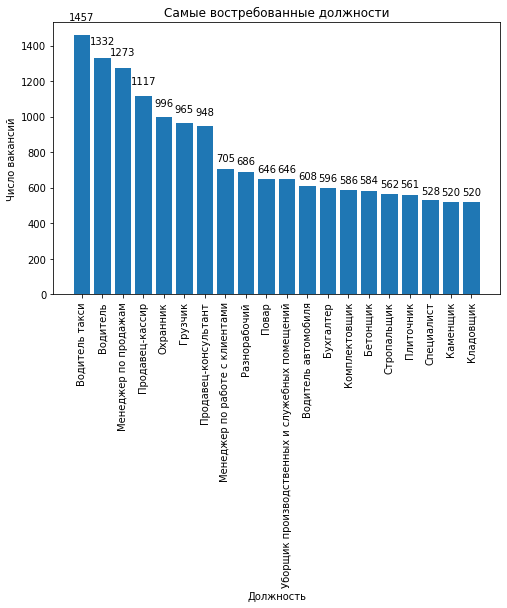

In [33]:
plot_count(
    jobs, 
    lambda job: job.name, 
    'Должность', 
    title='Самые востребованные должности', 
    top_n=20)

[('Пятерочка', 5971), ('Центр Найма Водителей', 3214), ('Барс Пром', 2687), ('Межрегиональный кадровый центр "Север"', 1928), ('Частное лицо/ИП/Компания', 1806), ('МАГНИТ, Розничная сеть', 1717), ('ОГАУЗ Кожевниковская РБ', 1697), ('Кадровый Центр Север-Вахта', 1521), ('Ресурс Групп', 1470), ('МКЦ Север', 1434), ('Полати', 1385), ('АО "Почта России" Приазовский почтамт', 1204), ('ГБУЗ Приморско-Ахтарская ЦРБ им. Кравченко Н.Г. МЗ КК', 1173), ('Mall Market', 1050), ('Fastzila', 906)]


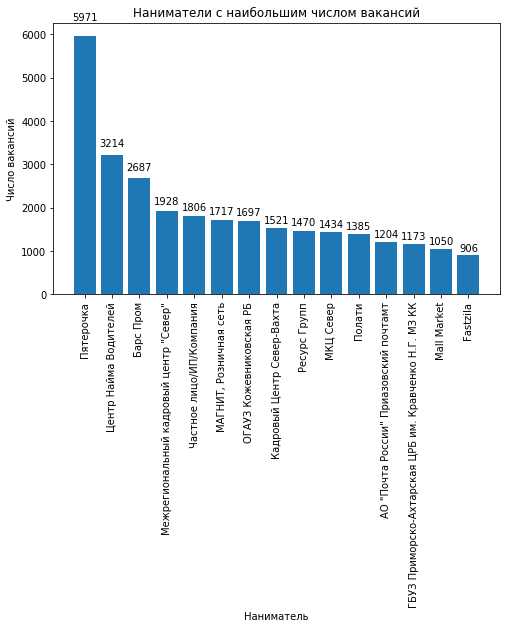

In [45]:
plot_count(
    jobs, 
    lambda job: job.employer if job.employer != 'Не указан' else None, 
    'Наниматель', 
    title='Наниматели с наибольшим числом вакансий', 
    top_n=15)

[('Продавец-кассир', 468), ('Администратор магазина', 150), ('Директор магазина', 119), ('Кладовщик / Комплектовщик', 63), ('Пекарь', 46), ('Заместитель директора магазина', 41), ('Водитель электроштабелера (Щербинка, Симферопольское шоссе, 20А стр 2)', 34), ('Старший продавец-кассир', 32), ('Мобильный продавец-кассир', 29), ('Администратор', 26), ('Старший Продавец-кассир', 25), ('Водитель электроштабелера (вахта, Щербинка, Симферопольское шоссе, 20А стр 2)', 24), ('Водитель электроштабелера (Вахта) (Щербинка, Симферопольское шоссе, 20А стр 2)', 21), ('Супервайзер', 20), ('Кассир-продавец', 19), ('Продавец-кассир мобильный', 17), ('Кладовщик, оператор склада (вахта) (Щербинка, Симферопольское шоссе, 20А стр 2)', 15), ('Инженер по эксплуатации', 15), ('Оператор склада со сменным графиком', 15), ('Заместитель Директора магазина', 13)]


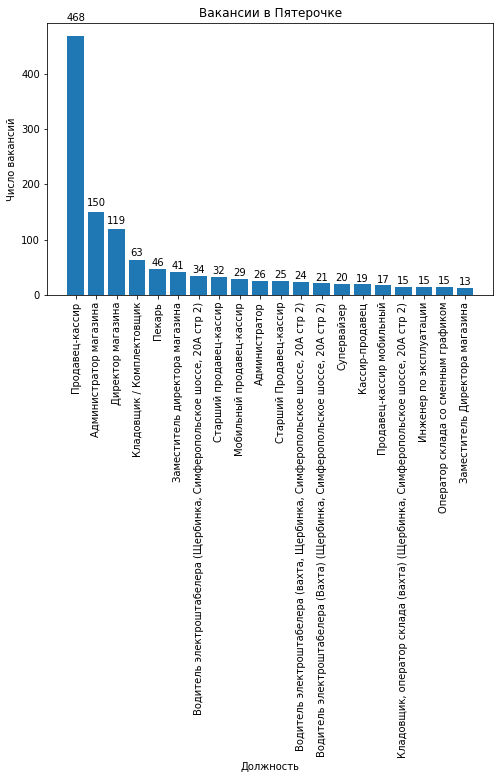

In [43]:
plot_count(
    jobs, 
    lambda job: job.name if job.name and job.employer == 'Пятерочка' else None, 
    'Должность', 
    title='Должности в Пятерочке', 
    top_n=20)

[('Центр Найма Водителей', 637), ('Сервис заказа такси Максим', 183), ('Яндекс. Такси (Центр Найма Водителей)', 124), ('Яндекс.Такси (Центр Найма Водителей)', 34), ('Такси Шоколад', 28), ('ООО "ЦентрПроф"', 27), ('Таксопарк Вояж', 23), ('Центр Найма Водителей (Яндекс. Такси)', 20), ('ТОЧНО', 20), ('Служба Доставки', 20)]


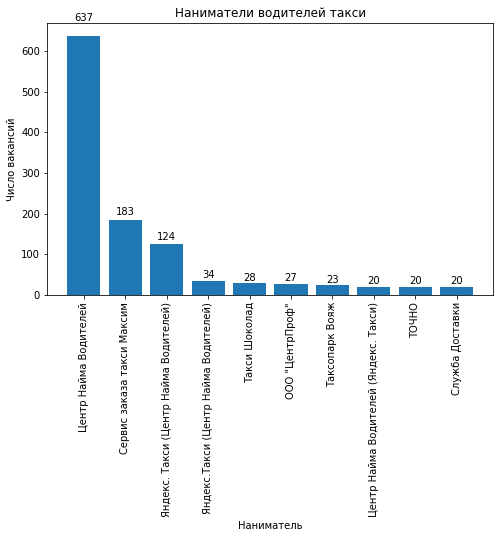

In [47]:
plot_count(
    jobs, 
    lambda job: job.employer if job.name == 'Водитель такси' else None, 
    'Наниматель', 
    title='Наниматели водителей такси', 
    top_n=10)

В топе нанимателей фигурируют застройщики. Например, ООО "Тапас плюс" и ОДО "СБФ-Плюс".

In [9]:
def median_of(vals):
    vals_sorted = sorted(vals)
    if len(vals_sorted) % 2 == 0:
        return (vals_sorted[len(vals_sorted) // 2] + vals_sorted[(len(vals_sorted) // 2) - 1]) / 2
    else:
        return vals_sorted[len(vals_sorted) // 2]

In [10]:
def plot_salary(jobs, extractor, xlabel, title=None, top_n=None, med=False, sort_max=True):
    min_salaries, max_salaries = {}, {}
    for job in jobs:
        label = extractor(job)
        if label is not None:
            if job.min_salary is not None:
                if label in min_salaries:
                    min_salaries[label].append(job.min_salary)
                else:
                    min_salaries[label] = [job.min_salary]
            if job.max_salary is not None:
                if label in max_salaries:
                    max_salaries[label].append(job.max_salary)
                else:
                    max_salaries[label] = [job.max_salary]
    min_salaries_min, min_salaries_med = {}, {}
    max_salaries_max, max_salaries_med = {}, {}
    for label, label_salaries in min_salaries.items():
        min_salaries_min[label] = min(label_salaries)
        min_salaries_med[label] = median_of(label_salaries)
    for label, label_salaries in max_salaries.items():
        max_salaries_max[label] = max(label_salaries)
        max_salaries_med[label] = median_of(label_salaries)
    data = sorted([(label, min_salary_med, max_salaries_med[label], min_salaries_min[label], max_salaries_max[label]) 
                   for label, min_salary_med in min_salaries_med.items()
                   if label in min_salaries_min and label in max_salaries_max and label in max_salaries_med], 
                   key=lambda e: e[2] if med else e[4],
                   reverse=sort_max)
    if top_n is not None:
        assert top_n < len(data)
        data = data[:top_n]
   
    print(data)
    plt.figure(figsize=(8, 5))
    if title:
        plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Заработная плата')
    plt.xticks(rotation='vertical')
    plt.errorbar(
        [e[0] for e in data],
        [(e[3] + e[4]) / 2 for e in data],
        yerr=[(e[4] - e[3]) / 2 for e in data],
        ls='none',
        capsize=8,
        color='c',
        lw=1
    )
    plt.errorbar(
        [e[0] for e in data],
        [(e[1] + e[2]) / 2 for e in data],
        yerr=[(e[2] - e[1]) / 2 for e in data],
        ls='none',
        capsize=4,
        color='b',
        lw=2
    )

[('Работник торгового зала (Ленинский р-н)', 3696000, 3696000, 3696000, 3696000), ('Вахтер', 19600, 19600, 9500, 1109880), ('консультант', 924900.0, 924900.0, 739920, 1109880), ('контролер', 566940.0, 566940.0, 24000, 1109880), ('помощник кладовщика', 1109880, 1109880, 1109880, 1109880), ('Менеджер по продажам', 30000, 40000, 10000, 1000000), ('Региональный менеджер по продажам', 55000.0, 70000.0, 10000, 1000000), ('Специалист по продаже недвижимости в Красной Поляне и Сочи', 225000, 1000000, 225000, 1000000), ('Суррогатное материнство', 1000000, 1000000, 1000000, 1000000), ('Юрист фз-44', 999999, 999999, 999999, 999999), ('Менеджер по персоналу.', 28000, 28000, 20000, 961900), ('оператор склада', 961900, 961900, 961900, 961900)]


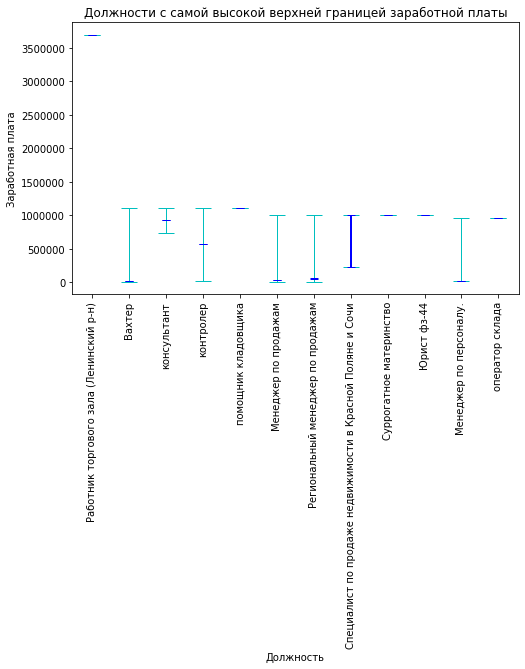

In [12]:
plot_salary(
    jobs, 
    lambda job: job.name, 
    'Должность', 
    title='Должности с самой высокой верхней границей заработной платы', 
    top_n=12)

In [28]:
print_selected(lambda job: job.name == 'Работник торгового зала (Ленинский р-н)')

{'name': 'Работник торгового зала (Ленинский р-н)', 'min_salary': None, 'max_salary': None, 'place': 'Кемерово', 'employer': 'Работут.', 'description': 'Приглашаем на работу сотрудников на должность РТЗ (Работник торгового зала). Подработка\\Работа \xa0в ПРОДУКТОВЫХ СУПЕРМАРКЕТАХ. Позвони сегодня и завтра сможешь выйти на работу! Стабильная работа даже в кризисное время. Мы выдаем ...'}

{'name': 'Работник торгового зала (Ленинский р-н)', 'min_salary': 3696000, 'max_salary': 3696000, 'place': 'Кемерово', 'employer': 'Работут.', 'description': 'Приглашаем на работу сотрудников на должность РТЗ (Работник торгового зала). ПодработкаРабота \xa0в ПРОДУКТОВЫХ СУПЕРМАРКЕТАХ. Позвони сегодня и завтра сможешь выйти на работу! ...'}



[('Вахтер', 19600, 19600, 9500, 1109880), ('консультант', 924900.0, 924900.0, 739920, 1109880), ('контролер', 566940.0, 566940.0, 24000, 1109880), ('помощник кладовщика', 1109880, 1109880, 1109880, 1109880), ('Менеджер по продажам', 30000, 40000, 10000, 1000000), ('Региональный менеджер по продажам', 55000.0, 70000.0, 10000, 1000000), ('Специалист по продаже недвижимости в Красной Поляне и Сочи', 225000, 1000000, 225000, 1000000), ('Суррогатное материнство', 1000000, 1000000, 1000000, 1000000), ('Юрист фз-44', 999999, 999999, 999999, 999999), ('Менеджер по персоналу.', 28000, 28000, 20000, 961900), ('оператор склада', 961900, 961900, 961900, 961900), ('Администратор-диспетчер', 961900, 961900, 961900, 961900)]


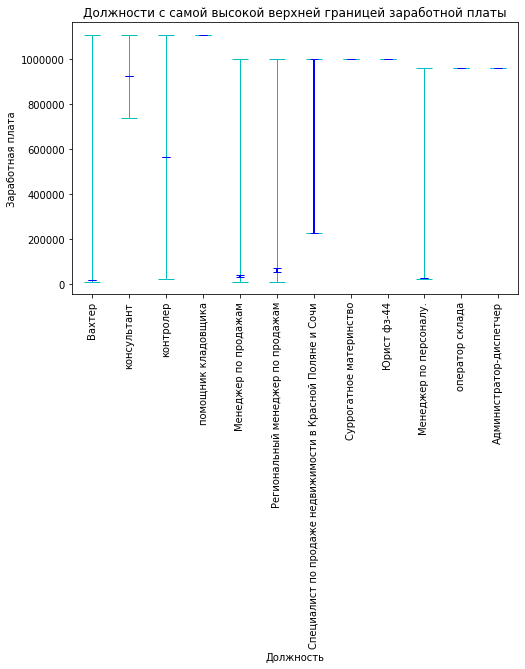

In [14]:
plot_salary(
    jobs, 
    lambda job: job.name if job.name != 'Работник торгового зала (Ленинский р-н)' else None, 
    'Должность', 
    title='Должности с самой высокой верхней границей заработной платы', 
    top_n=12)

In [29]:
print_selected(lambda job: job.name == 'Вахтер')

{'name': 'Вахтер', 'min_salary': None, 'max_salary': None, 'place': 'Обнинск', 'employer': 'АО "ОНПП "Технология"', 'description': 'Условия труда: Временная работа работа временная, до 31.08.2019 г., трудоустройство в соответствии с ТК РФ'}

{'name': 'Вахтер', 'min_salary': 45000, 'max_salary': 45000, 'place': 'Петрозаводск', 'employer': 'Service Group', 'description': '- Уборка в общежитии;- Уборка санузлов, душевых, коридоров, лестниц, окон, мусорных корзин;- Выдача постельного белья- Обеспечение порядка, чистоты помещенийТип занятости:работа вахтовым ...'}

{'name': 'Вахтер', 'min_salary': None, 'max_salary': None, 'place': 'Московская область, Мытищи', 'employer': 'ПСК Ротопласт', 'description': 'Зарплата 1000 рублей смена. График работы сутки-трое.Контроль прохода посетителей и проезда автотранспорта на территорию организации с записью в журнал регистрации и выдачей временных пропусков.Без вредных привычек. ПК на уровне ...'}

{'name': 'Вахтер', 'min_salary': None, 'max_salary': N

[('Работник торгового зала (Ленинский р-н)', 3696000, 3696000, 3696000, 3696000), ('помощник кладовщика', 1109880, 1109880, 1109880, 1109880), ('Специалист по продаже недвижимости в Красной Поляне и Сочи', 225000, 1000000, 225000, 1000000), ('Суррогатное материнство', 1000000, 1000000, 1000000, 1000000), ('Юрист фз-44', 999999, 999999, 999999, 999999), ('оператор склада', 961900, 961900, 961900, 961900), ('Администратор-диспетчер', 961900, 961900, 961900, 961900), ('Специалист по продажам домов', 350000, 950000, 350000, 950000), ('Агент по продажам загородной недвижимости', 950000, 950000, 950000, 950000), ('консультант', 924900.0, 924900.0, 739920, 1109880), ('Риэлтор без опыта/менеджер по продажам недвижимости', 900000, 900000, 900000, 900000), ('Менеджер(агент) по продаже недвижимости', 75000, 750000, 75000, 750000)]


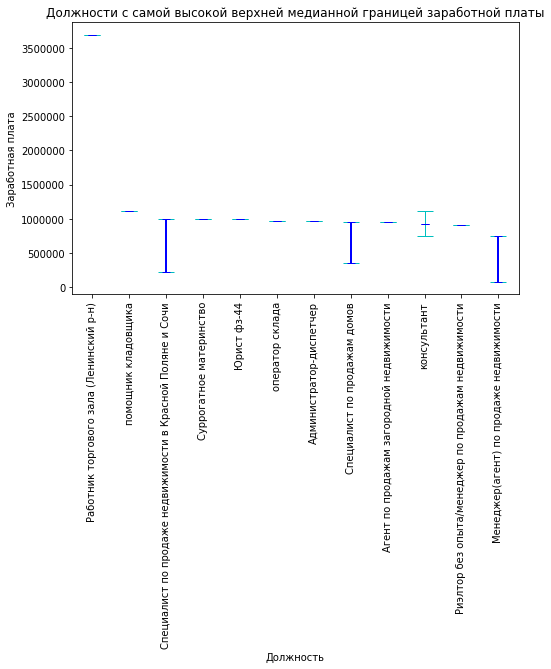

In [18]:
plot_salary(
    jobs, 
    lambda job: job.name, 
    'Должность', 
    title='Должности с самой высокой верхней медианной границей заработной платы', 
    top_n=12,
    med=True)

[('помощник кладовщика', 1109880, 1109880, 1109880, 1109880), ('Специалист по продаже недвижимости в Красной Поляне и Сочи', 225000, 1000000, 225000, 1000000), ('Суррогатное материнство', 1000000, 1000000, 1000000, 1000000), ('Юрист фз-44', 999999, 999999, 999999, 999999), ('оператор склада', 961900, 961900, 961900, 961900), ('Администратор-диспетчер', 961900, 961900, 961900, 961900), ('Специалист по продажам домов', 350000, 950000, 350000, 950000), ('Агент по продажам загородной недвижимости', 950000, 950000, 950000, 950000), ('консультант', 924900.0, 924900.0, 739920, 1109880), ('Риэлтор без опыта/менеджер по продажам недвижимости', 900000, 900000, 900000, 900000), ('Менеджер(агент) по продаже недвижимости', 75000, 750000, 75000, 750000), ('Токарь- расточник', 750000, 750000, 750000, 750000)]


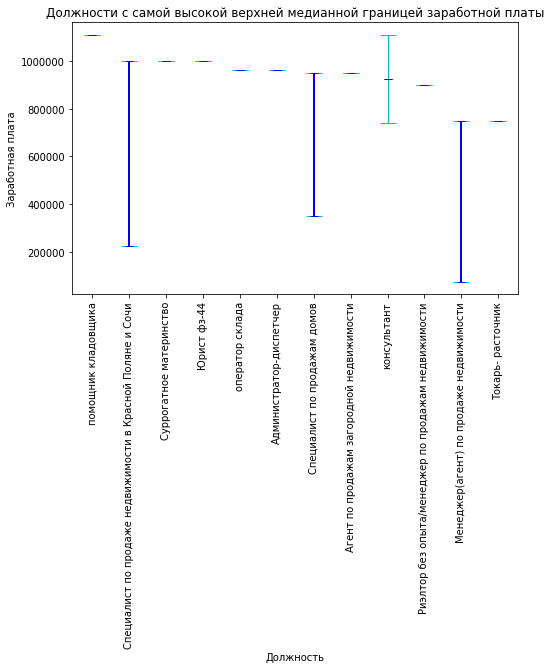

In [20]:
plot_salary(
    jobs, 
    lambda job: job.name if job.name != 'Работник торгового зала (Ленинский р-н)' else None,
    'Должность', 
    title='Должности с самой высокой верхней медианной границей заработной платы', 
    top_n=12,
    med=True)

[('Сотрудник в офис с функциями помоутера', 160, 160, 160, 160), ('Сотрудник с опытом работы оператором на телефоне', 160, 160, 160, 160), ('Офисный сотрудник для развития бизнеса', 160, 160, 160, 160), ('Специалист с педагогически образованием', 160, 160, 160, 160), ('Специалист с функциями бухгалтера', 160, 160, 160, 160), ('Сотрудник с функционалом секретарь', 160, 160, 160, 160), ('Рабочие в кондитерский цех', 160, 160, 160, 160), ('Уборщик-уборщица', 160, 160, 160, 160), ('С опытом (без) менеджера в отдел продаж', 160, 160, 160, 160), ('С опытом (без) диспетчера-оператора', 160, 160, 160, 160), ('Требуется главный бухгалтер', 160, 160, 160, 160), ('Сотрудник с дипломом экономиста', 160, 160, 160, 160)]


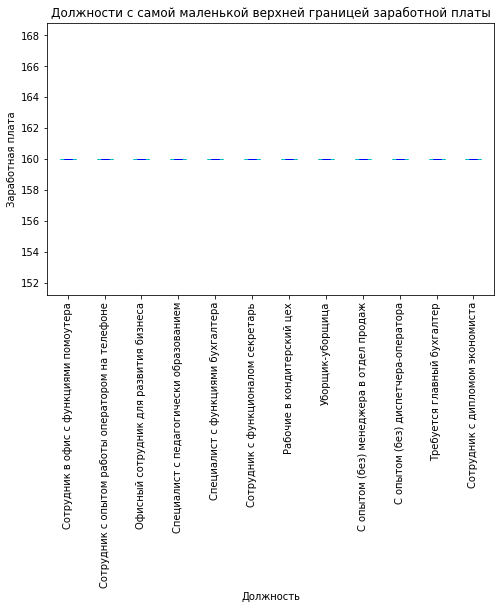

In [24]:
plot_salary(
    jobs, 
    lambda job: job.name,
    'Должность', 
    title='Должности с самой маленькой верхней границей заработной платы', 
    top_n=12,
    sort_max=False)

In [30]:
print_selected(lambda job: job.min_salary == job.max_salary == 160)

{'name': 'Тендерный специалист', 'min_salary': 160, 'max_salary': 160, 'place': 'Новороссийск', 'employer': 'ООО "ДТС"', 'description': 'Описание работодателя: ОООВыполнять поиск поставленных целей, грамотно и в совершенстве готовить документы, и ориентироваться только на положительный результат.Работать в Новороссийске. Удаленно.'}

{'name': 'Слесарь-ремонтник', 'min_salary': 160, 'max_salary': 160, 'place': 'Саранск', 'employer': 'Александр', 'description': 'Описание работодателя:Строительная компания, специализируется на строительстве и ремонте технологического оборудования.Ответственность.8-10 часовой раб. день, оплата своевременно.'}

{'name': 'Водитель в такси', 'min_salary': 160, 'max_salary': 160, 'place': 'Саранск', 'employer': 'ГЕННАДИЙ', 'description': 'Требуется водитель на автомобиль Лада Гранта. Машине год. Газовое оборудование. Лицензия. Программа "Драйв".Обеспечение заказами. График работы 6/1. План 8000руб.в неделю.На время самоизоляции план гораздо ниже.Обычный круг .

[('Работут.', 20000, 20000, 12500, 3696000), ('ООО"ГАММА"', 123320, 123320, 110989, 1109880), ('ОНИКС-Недвижимость', 150000, 250000, 50000, 1000000), ('Московский центр ВРТ', 1000000, 1000000, 1000000, 1000000), ('ЛФМ', 1000000, 1000000, 1000000, 1000000), ('Роман Русских', 522500.0, 522500.0, 45000, 1000000), ('Игорь', 30000, 30000, 160, 999999), ('Денис Леонидович.', 961900, 961900, 961900, 961900), ('Зеленый корридор', 536444.5, 536444.5, 110989, 961900), ('Винсент Недвижимость', 360000.0, 550000.0, 100000, 950000), ('КА "Актив"', 50000, 70000, 25000, 900000), ('Акведук', 70000.0, 70000.0, 20000, 900000)]


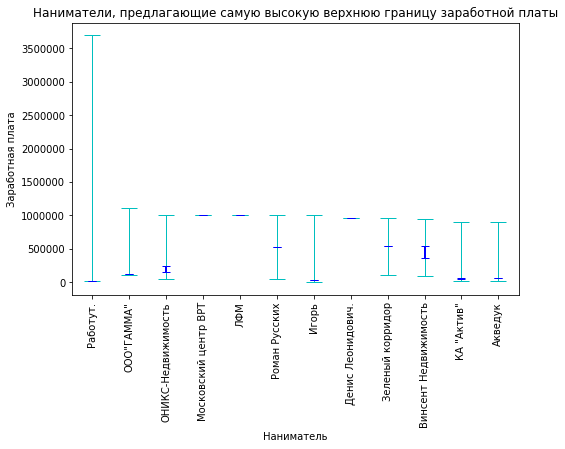

In [26]:
plot_salary(
    jobs, 
    lambda job: job.employer if job.employer != 'Не указан' else None, 
    'Наниматель', 
    title='Наниматели, предлагающие самую высокую верхнюю границу заработной платы', 
    top_n=12)

In [33]:
print_selected(lambda job: job.employer == 'Работут.')

{'name': 'Визитный мерчендайзер', 'min_salary': 25000, 'max_salary': 25000, 'place': 'Севастополь', 'employer': 'Работут.', 'description': 'Требуется сотрудник на выкладку товара, работа в ГМ Метро и Яблоко. Обязанности: - работа в нескольких торговых точках - выкладка товара, проверка сроков годности и ценников - ...'}

{'name': 'Бухгалтер по расчету заработной платы', 'min_salary': 35000, 'max_salary': 35000, 'place': 'Севастополь, Крым', 'employer': 'Работут.', 'description': 'Обязанности: расчет заработной платы сотрудникам компании в разрезе обособленных подразделений ЗУП 8.3; расчет отпусков, больничных листов, увольнений, командировок, проведение суточных и так далее; расчет договоров подряда; формирование и ...'}

{'name': 'Бухгалтер на первичную документацию', 'min_salary': None, 'max_salary': None, 'place': 'Севастополь', 'employer': 'Работут.', 'description': 'Обязанности: - ведение первичной документации; - подготовка к сдаче НДС и прибыли; - проведение актов сверок с контр

[('Московский центр ВРТ', 1000000, 1000000, 1000000, 1000000), ('ЛФМ', 1000000, 1000000, 1000000, 1000000), ('Денис Леонидович.', 961900, 961900, 961900, 961900), ('БВБ-Альянс', 603037, 603037, 603037, 603037), ('Локомотив', 60000, 600000, 60000, 600000), ('АН "STATUS"', 75000.0, 600000.0, 75000, 600000), ('Адвокатское бюро Статус', 75000, 600000, 75000, 600000), ('ООО ЭраНедвижимость', 60000, 600000, 60000, 600000), ('Руководитель', 560000.0, 560000.0, 520000, 600000), ('Винсент Недвижимость', 360000.0, 550000.0, 100000, 950000), ('Зеленый корридор', 536444.5, 536444.5, 110989, 961900), ('Роман Русских', 522500.0, 522500.0, 45000, 1000000)]


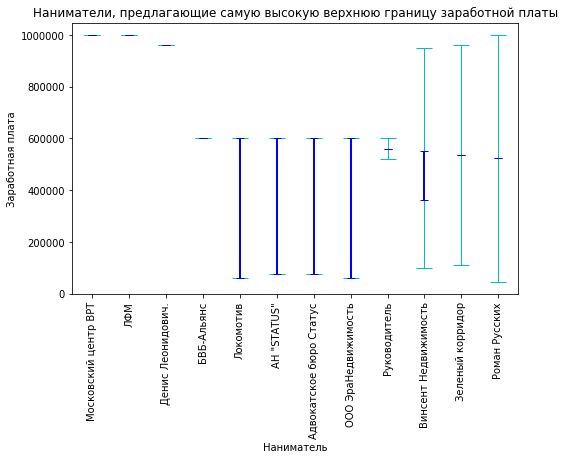

In [20]:
plot_salary(
    jobs, 
    lambda job: job.employer if job.employer != 'Не указан' else None, 
    'Наниматель', 
    title='Наниматели, предлагающие самую высокую верхнюю границу заработной платы', 
    top_n=12,
    med=True)

In [11]:
global_min_salary_min = min([job.min_salary for job in jobs if job.min_salary is not None])
global_max_salary_max = max([job.max_salary for job in jobs if job.max_salary is not None])
print(f'Salary absolute borders: {global_min_salary_min}-{global_max_salary_max}')

Salary absolute borders: 160-3696000


In [12]:
global_min_salary_med = median_of([job.min_salary for job in jobs if job.min_salary is not None])
global_max_salary_med = median_of([job.max_salary for job in jobs if job.max_salary is not None])
print(f'Salary median borders: {global_min_salary_med}-{global_max_salary_med}')

Salary median borders: 35000.0-40000.0


Медианная зарплата по России за апрель 2019-го года составила 34335 рублей.

In [15]:
global_min_salary_mean = int(mean([job.min_salary for job in jobs if job.min_salary is not None]))
global_max_salary_mean = int(mean([job.max_salary for job in jobs if job.max_salary is not None]))
print(f'Salary mean borders: {global_min_salary_mean}-{global_max_salary_mean}')

Salary mean borders: 44815-50260


Медианная зарплата по России за апрель 2019-го года составила 47600 рублей.